In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [5]:
sam_df = pd.read_csv('/kaggle/input/samsung-stocks/Samsung.csv')
sam_df['Date'] = pd.to_datetime(sam_df['Date'])
sam_df = sam_df.set_index('Date')

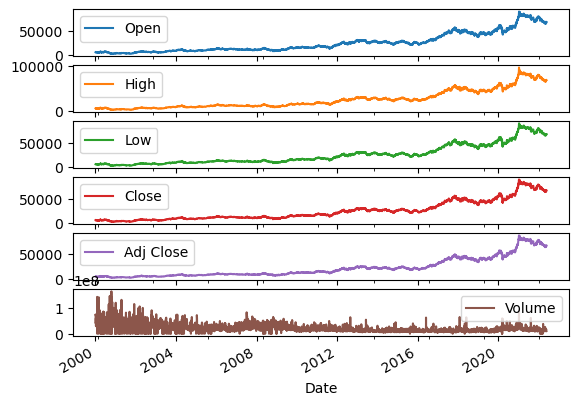

In [6]:
sam_df.plot(subplots=True)
plt.show()

In [14]:
apple_df.sample()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-10,0.301607,0.30875,0.299107,0.306786,0.262693,176646400


In [8]:
train_data = sam_df.iloc[:int(len(sam_df) * 0.8)]
test_data = sam_df.iloc[int(len(sam_df) * 0.8):]

In [9]:
exog_train = train_data[['Volume']]  
exog_test = test_data[['Volume']]

In [10]:
order = (2, 1, 2)  
seasonal_order = (0, 0, 0, 12)  
model = SARIMAX(train_data['Close'], order=order, seasonal_order=seasonal_order, exog=exog_train)
model_fit = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.22583D+00    |proj g|=  9.52340D+03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1     21      1     0     0   9.523D+03   7.226D+00
  F =   7.2258341071462207     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=exog_test)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [12]:
mse = mean_squared_error(test_data['Close'], predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 209994237.25004813


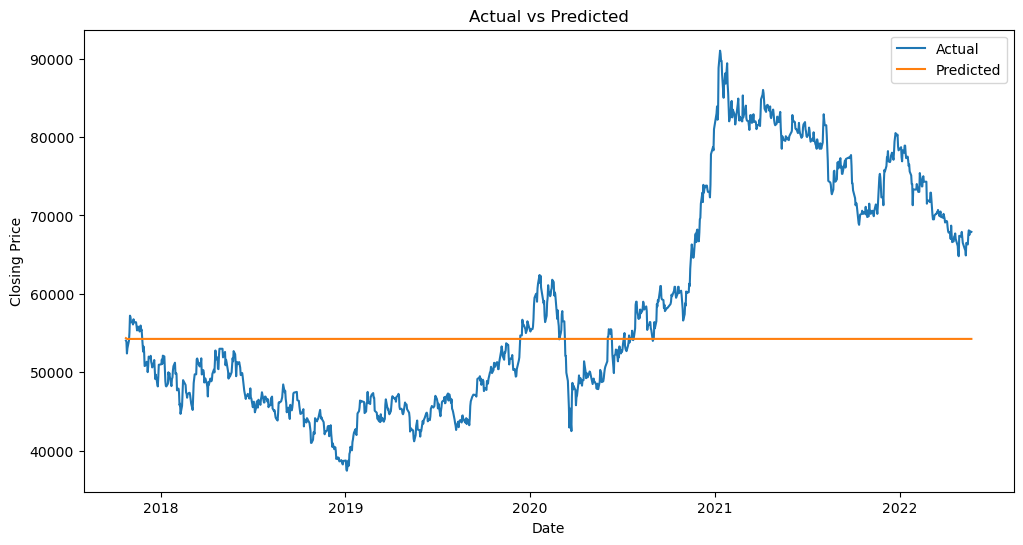

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()